Project Name - **Covid 19 Analysis and Prediction**

Group Members-

**Pradnya Salve**

**Poonam Wagh**

Batch - **B4**

Domain - **Machine Learning**


GROUP MEMBERS


**Importing required libraries**

In [ ]:
import numpy as np 
import pandas as pd 


**Loading the covid-19 india date-wise record**

In [ ]:
df=pd.read_csv("/content/sample_data/covid_19_india.csv")
state_testing = pd.read_csv('/content/sample_data/StatewiseTestingDetails.csv')
df_vc = pd.read_csv('/content/sample_data/covid_vaccine_statewise.csv')

In [ ]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


**Checking for any null values**

In [ ]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

**Dropping the columns which are not going to be used**

In [ ]:

df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

**Finding the active cases**

In [ ]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [ ]:
df['Confirmed'] = pd.to_numeric(df['Confirmed'], errors='coerce')
df['Confirmed']=df['Confirmed'].fillna(0)
df['Confirmed']=df['Confirmed'].astype('int')

df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Deaths']=df['Deaths'].fillna(0)
df['Deaths']=df['Deaths'].astype('int')

df['Cured'] = pd.to_numeric(df['Cured'], errors='coerce')
df['Cured']=df['Cured'].fillna(0)
df['Cured']=df['Cured'].astype('int')

df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Deaths']=df['Deaths'].fillna(0)
df['Deaths']=df['Deaths'].astype('int')

df['Cured'] = pd.to_numeric(df['Cured'], errors='coerce')
df['Cured']=df['Cured'].fillna(0)
df['Cured']=df['Cured'].astype('int')

**Statewise Analysis**

**Finding recovery rate and mortality rate in Covid 19 patients** 

In [ ]:
statewise = pd.pivot_table(df, values=['Confirmed','Deaths','Cured'], index='State/UnionTerritory', aggfunc='max')
statewise['Recovery Rate'] = statewise['Cured']*100 / statewise['Confirmed']
statewise['Mortality Rate'] = statewise['Deaths']*100 /statewise['Confirmed']
statewise = statewise.sort_values(by='Confirmed', ascending= False)
statewise.style.background_gradient(cmap='YlOrRd')

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [ ]:
# Data Cleaning
state_testing['TotalSamples']=state_testing['TotalSamples'].fillna(0)
state_testing['TotalSamples']=state_testing['TotalSamples'].astype('int')
state_testing['Positive']=state_testing['Positive'].fillna(0)
state_testing['Positive']=state_testing['Positive'].astype('int')
state_testing['Negative']=state_testing['Negative'].fillna(0)
#state_testing['Negative']=state_testing['Negative'].astype('int')

**Finding statewise rate of positive cases**

In [ ]:
statewise_testing = pd.pivot_table(state_testing, values=['TotalSamples','Positive','Negative'], index='State', aggfunc='max')
statewise_testing['Positive_Case_Rate'] = statewise_testing['Positive']*100 / statewise_testing['TotalSamples']
statewise_testing['Positive_Case_Rate']=round(statewise_testing['Positive_Case_Rate'].astype('int'),2)
statewise_testing = statewise_testing.sort_values(by='TotalSamples', ascending= False)
statewise_testing.style.background_gradient(cmap='YlOrRd')

,Positive,TotalSamples,Positive_Case_Rate
State,,,
Uttar Pradesh,126722,67897856,0
Maharashtra,1638961,49905065,3
Karnataka,264546,40104915,0
Tamil Nadu,367430,39002757,0
Bihar,90553,38820518,0
Kerala,932639,28745545,3
Gujarat,136004,26192626,0
Andhra Pradesh,235525,25311733,0
Delhi,151928,24333906,0


**Visualizations**

In [ ]:
# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from IPython.display import display, Markdown

In [ ]:
testing=state_testing.groupby('State')['TotalSamples'].max().sort_values(ascending=False).reset_index()
fig = px.bar(testing, 
             x="TotalSamples",
             y="State", 
             orientation='h',
             height=800,
             title='Statewise Testing',
            color='State')
fig.show()


In [ ]:
plt.figure(figsize = (18,10))
figure = px.line(df, x='Date', y='Confirmed', color='State/UnionTerritory')
figure.update_xaxes(rangeslider_visible=True)
pyo.iplot(figure)

<Figure size 1296x720 with 0 Axes>

In [ ]:
df1=df.groupby('Date')[['Cured','Deaths','Confirmed']].sum()

In [ ]:
df1.tail()

,Cured,Deaths,Confirmed
Date,,,
2021-08-07,31055861,427371,31895385
2021-08-08,31099771,427862,31934455
2021-08-09,31139457,428309,31969954
2021-08-10,31180968,428682,31998158
2021-08-11,31220981,429179,32036511


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df1.index, y=df1["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=df1.index, y=df1["Cured"],
                    mode='lines+markers',
                    name='Cured Cases'))
fig.add_trace(go.Scatter(x=df1.index, y=df1["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=df1.index, y=(df1["Cured"]/df1["Confirmed"])*100,
              name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df1.index, y=(df1["Deaths"]/df1["Confirmed"])*100,
              name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

In [ ]:
growth_diff = []

for i in range(1,len(df1['Confirmed'])):
    growth_diff.append(df1['Confirmed'][i] / df1['Confirmed'][i-1])

growth_factor = sum(growth_diff)/len(growth_diff)
print('Average growth factor',growth_factor)

Average growth factor 1.0370264842594674


In [ ]:
df1.reset_index(inplace=True)
df1.head()

,Date,Cured,Deaths,Confirmed
0,2020-01-30,0,0,1
1,2020-01-31,0,0,1
2,2020-02-01,0,0,2
3,2020-02-02,0,0,3
4,2020-02-03,0,0,3


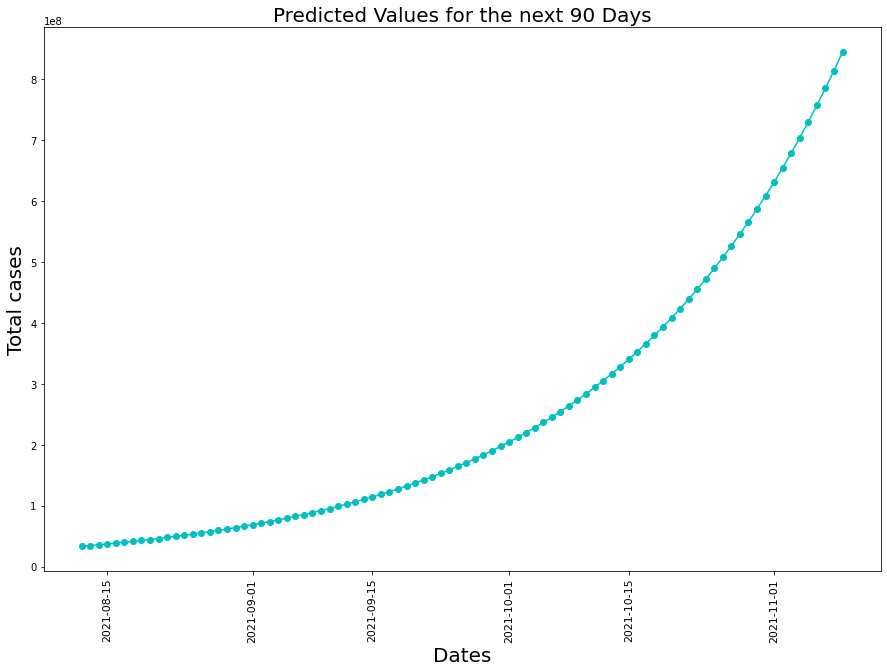

In [ ]:
prediction_dates = []
from datetime import datetime,timedelta
df1['Date']=pd.to_datetime(df1['Date'], format='%Y-%m-%d')
start_date = df1['Date'][len(df1['Date']) - 1]
for i in range(90):
    date = start_date +timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
previous_day_cases = df1['Confirmed'][len(df1['Date']) - 1]
predicted_cases = []

for i in range(90):
    predicted_value = previous_day_cases *  growth_factor
    predicted_cases.append(predicted_value)
    previous_day_cases = predicted_value

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 90 Days" , fontsize = 20)
ax1 = plt.plot_date(y= predicted_cases,x= prediction_dates,linestyle ='-',color = 'c')

**Effect of Lockdown**

In [ ]:
No_Lockdown=df1[df1["Date"]<pd.to_datetime("2020-03-24")]
Lockdown_1=df1[(df1["Date"]>=pd.to_datetime("2020-03-24"))&(df1["Date"]<pd.to_datetime("2020-07-15"))]
Lockdown_2=df1[(df1["Date"]>=pd.to_datetime("2020-07-15"))&(df1["Date"]<pd.to_datetime("2020-11-04"))]
Lockdown_3=df1[(df1["Date"]>=pd.to_datetime("2020-11-04"))&(df1["Date"]<pd.to_datetime("2021-02-19"))]
Lockdown_4=df1[(df1["Date"]>=pd.to_datetime("2021-02-19"))&(df1["Date"]<=pd.to_datetime("2021-05-31"))]
Unlock_1=df1[(df1["Date"]>=pd.to_datetime("2020-06-01"))&(df1["Date"]<=pd.to_datetime("2020-06-30"))]
Unlock_2=df1[(df1["Date"]>=pd.to_datetime("2020-07-01"))]

No_Lockdown_datewise=No_Lockdown.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_1_datewise=Lockdown_1.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_2_datewise=Lockdown_2.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_3_datewise=Lockdown_3.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_4_datewise=Lockdown_4.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Unlock_1_datewise=Unlock_1.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Unlock_2_datewise=Unlock_2.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})

No_Lockdown_datewise["Active Cases"]=No_Lockdown_datewise["Confirmed"]-No_Lockdown_datewise["Cured"]-No_Lockdown_datewise["Deaths"]
Lockdown_1_datewise["Active Cases"]=Lockdown_1_datewise["Confirmed"]-Lockdown_1_datewise["Cured"]-Lockdown_1_datewise["Deaths"]
Lockdown_2_datewise["Active Cases"]=Lockdown_2_datewise["Confirmed"]-Lockdown_2_datewise["Cured"]-Lockdown_2_datewise["Deaths"]
Lockdown_3_datewise["Active Cases"]=Lockdown_3_datewise["Confirmed"]-Lockdown_3_datewise["Cured"]-Lockdown_3_datewise["Deaths"]
Lockdown_4_datewise["Active Cases"]=Lockdown_4_datewise["Confirmed"]-Lockdown_4_datewise["Cured"]-Lockdown_4_datewise["Deaths"]
Unlock_1_datewise["Active Cases"]=Unlock_1_datewise["Confirmed"]-Unlock_1_datewise["Cured"]-Unlock_1_datewise["Deaths"]
Unlock_2_datewise["Active Cases"]=Unlock_2_datewise["Confirmed"]-Unlock_2_datewise["Cured"]-Unlock_2_datewise["Deaths"]

No_Lockdown_datewise["Days Since"]=(No_Lockdown_datewise.index-No_Lockdown_datewise.index.min()).days
Lockdown_1_datewise["Days Since"]=(Lockdown_1_datewise.index-Lockdown_1_datewise.index.min()).days
Lockdown_2_datewise["Days Since"]=(Lockdown_2_datewise.index-Lockdown_2_datewise.index.min()).days
Lockdown_3_datewise["Days Since"]=(Lockdown_3_datewise.index-Lockdown_3_datewise.index.min()).days
Lockdown_4_datewise["Days Since"]=(Lockdown_4_datewise.index-Lockdown_4_datewise.index.min()).days
Unlock_1_datewise["Days Since"]=(Unlock_1_datewise.index-Unlock_1_datewise.index.min()).days
Unlock_2_datewise["Days Since"]=(Unlock_2_datewise.index-Unlock_2_datewise.index.min()).days

print("Average Active Cases growth rate in Lockdown 1.0: ",(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 1.0: ",(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 2.0: ",(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 2.0: ",(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 3.0: ",(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 3.0: ",(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 4.0: ",(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 4.0: ",(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Unlock 1.0: ",(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Unlock 1.0: ",(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()).median())

Average Active Cases growth rate in Lockdown 1.0:  1.0611560639753137
Median Active Cases growth rate in Lockdown 1.0:  1.0426155427017767
Average Active Cases growth rate in Lockdown 2.0:  1.004941539304629
Median Active Cases growth rate in Lockdown 2.0:  1.0051421081236613
Average Active Cases growth rate in Lockdown 3.0:  0.9869638774273347
Median Active Cases growth rate in Lockdown 3.0:  0.9881672030831116
Average Active Cases growth rate in Lockdown 4.0:  1.0276951647800772
Median Active Cases growth rate in Lockdown 4.0:  1.0303569221473008
Average Active Cases growth rate in Unlock 1.0:  1.0292823925483092
Median Active Cases growth rate in Unlock 1.0:  1.0286948988535212


**Prediction**

In [ ]:
predIndiaDF = df1.copy()
extended_period = 2000
from scipy.optimize import curve_fit
def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0))) + 1

popt, pcov = curve_fit(sigmoid,  (predIndiaDF.index+1).astype(float), predIndiaDF['Confirmed'],  p0=(0,0,0),maxfev=5000 )
x0 = int(popt[2]/10)
print('\033[1mx0 (point/day of inflexion):\033[0m',int(popt[2]/10))
print('\033[1mL (Maximum no.of cases):\033[0m',int(popt[0]/10000) )
print('\033[1mk (Growth Rate):\033[0m',round(float(popt[1]),2) )
print('\033[1mPCOV: \033[0m\n',pcov )

fig = go.Figure()
dateRange = pd.date_range(pd.to_datetime(predIndiaDF['Date'].min()),\
                                         pd.to_datetime(predIndiaDF['Date'].min())+pd.DateOffset(extended_period))

fig.add_trace(go.Scatter(x = predIndiaDF['Date'],
                         y = predIndiaDF['Confirmed'],
                         mode = 'lines',
                         name = 'Observed'))
fig.add_trace(go.Scatter(x = dateRange[:600],
                         y = sigmoid([x for x in range(extended_period)],*popt),
                         mode = 'lines',
                         name = 'Predicted'))
fig.add_trace(go.Scatter(x = [dateRange[x0], dateRange[x0]],
                         y = [0,  sigmoid([x for x in range(extended_period)],*popt)[x0]],
                         name = 'X0 - Inflexion point',
                         mode = 'lines'))

fig.update_layout(template='plotly_dark',title='Projected Confirmed Cases')
fig.show()

x0 (point/day of inflexion): 59
L (Maximum no.of cases): 8151
k (Growth Rate): 0.01
PCOV: 
 [[ 9.65384796e+13 -2.72822826e+03  2.43080876e+08]
 [-2.72822826e+03  8.91315475e-08 -7.05572390e-03]
 [ 2.43080876e+08 -7.05572390e-03  6.16079131e+02]]


**Vaccination Progress**

In [ ]:
vc_pro =df_vc.groupby('State')['Total Individuals Vaccinated'].max().reset_index().sort_values(['Total Individuals Vaccinated'],ascending=False)
vc_pro

,State,Total Individuals Vaccinated
13,India,250656880.0
34,Uttar Pradesh,24782239.0
21,Maharashtra,24046509.0
29,Rajasthan,19090259.0
10,Gujarat,18826982.0
16,Karnataka,17493598.0
20,Madhya Pradesh,16512594.0
36,West Bengal,15798841.0
4,Bihar,13127210.0
31,Tamil Nadu,11658908.0


In [ ]:
mh = df_vc[df_vc["State"]=="Maharashtra"] 
mh.head(10)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
4453,16/01/2021,Maharashtra,5726.0,179.0,174.0,5726.0,0.0,3668.0,2057.0,1.0,85.0,5641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5726.0
4454,17/01/2021,Maharashtra,6521.0,269.0,216.0,6521.0,0.0,3953.0,2566.0,2.0,94.0,6427.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6521.0
4455,18/01/2021,Maharashtra,6151.0,772.0,320.0,6151.0,0.0,3569.0,2581.0,1.0,105.0,6046.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6151.0
4456,19/01/2021,Maharashtra,13699.0,1196.0,340.0,13699.0,0.0,6328.0,7367.0,4.0,214.0,13485.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13699.0
4457,20/01/2021,Maharashtra,23880.0,1547.0,347.0,23880.0,0.0,9658.0,14205.0,17.0,439.0,23441.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23880.0
4458,21/01/2021,Maharashtra,24148.0,1820.0,357.0,24148.0,0.0,9784.0,14347.0,17.0,443.0,23705.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24148.0
4459,22/01/2021,Maharashtra,44369.0,2012.0,374.0,44369.0,0.0,16546.0,27802.0,21.0,840.0,43529.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44369.0
4460,23/01/2021,Maharashtra,69295.0,2435.0,483.0,69295.0,0.0,25333.0,43937.0,25.0,1156.0,68139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69295.0
4461,24/01/2021,Maharashtra,70196.0,2756.0,581.0,70196.0,0.0,25661.0,44510.0,25.0,1157.0,69039.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70196.0
4462,25/01/2021,Maharashtra,107073.0,3170.0,617.0,107073.0,0.0,38512.0,68527.0,34.0,1433.0,105640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107073.0


In [ ]:
fig = px.line(mh,x="Updated On",y="Total Individuals Vaccinated",title="Total Individuals Vaccinated from day to day")  
fig.update_xaxes(rangeslider_visible=True) 

In [ ]:
first = mh["First Dose Administered"].sum() 
second = mh["Second Dose Administered"].sum() 
px.pie(names=["First Dose","Second dose"],values=[first,second],title ="First and Second dosage ratio for covid in maharashtra")